In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

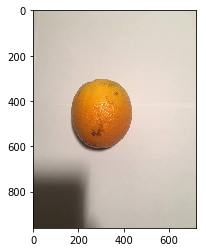

In [69]:
#read image
img = cv2.imread('../photos_images/orange1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

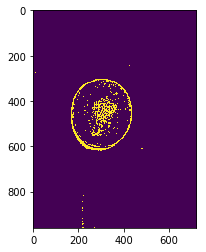

In [70]:
#converting image to graysclae to find threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
thresh = cv2.adaptiveThreshold(gray, 50, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
plt.imshow(thresh)

In [71]:
_, cnts, _  = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [72]:
# with each contour, draw boundingRect in green
# a minAreaRect in blue
minAreaRect = []
boxes = []

for i,c in enumerate(cnts):
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)

    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    minAreaRect = box
    boxes.append((i,box,w,h))

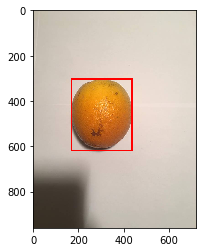

In [73]:
#order all the contours by area from biggest to smallest
boxes.sort(key=lambda x: x[2]*x[3], reverse=True)

#now we want to select the second biggest box (since the biggest one is the contour of the whole image)
minAreaRectangle = boxes[0][1]

#show that this is the contour we want
cv2.drawContours(img, [minAreaRectangle], 0, (255, 0, 0), 6)
plt.imshow(img)

In [74]:
#get x and y points and width/height of the countour we selected
x,y,w,h = cv2.boundingRect(minAreaRectangle)

if w > h:
    temp = w
    w = h
    h = temp

[w, h]

[268, 316]